In [38]:
import pandas as pd

nba_file = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/nba.csv"
df_nba = pd.read_csv(nba_file)
print(df_nba.head())

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [39]:
def altura_para_cm(altura_str):
      pes, polegadas = map(int, altura_str.split('-'))
      total_polegadas = (pes * 12) + polegadas
      return total_polegadas * 2.54

def peso_para_kg(peso_libras):
    return peso_libras * 0.453592

df_nba['Height_cm'] = df_nba['Height'].apply(altura_para_cm)
df_nba['Weight_kg'] = df_nba['Weight'].apply(peso_para_kg)

print("DataFrame com Medidas Ajustadas")
print(df_nba[['Name', 'Team', 'Height', 'Height_cm', 'Weight', 'Weight_kg']].head())

DataFrame com Medidas Ajustadas
            Name            Team Height  Height_cm  Weight   Weight_kg
0  Avery Bradley  Boston Celtics    6-2     187.96   180.0   81.646560
1    Jae Crowder  Boston Celtics    6-6     198.12   235.0  106.594120
2   John Holland  Boston Celtics    6-5     195.58   205.0   92.986360
3    R.J. Hunter  Boston Celtics    6-5     195.58   185.0   83.914520
4  Jonas Jerebko  Boston Celtics   6-10     208.28   231.0  104.779752


In [40]:
contagem_jogadores = pd.crosstab(index=df_nba['Team'], columns=df_nba['Position'])

print("Contagem de jogadores por time e posição:")
display(contagem_jogadores)

Contagem de jogadores por time e posição:


Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,3,4,2,2,4
Boston Celtics,3,3,4,1,4
Brooklyn Nets,2,4,3,0,6
Charlotte Hornets,3,3,3,1,5
Chicago Bulls,2,5,2,2,4
Cleveland Cavaliers,3,2,3,2,5
Dallas Mavericks,3,4,4,2,2
Denver Nuggets,3,2,3,3,4
Detroit Pistons,3,2,4,4,2


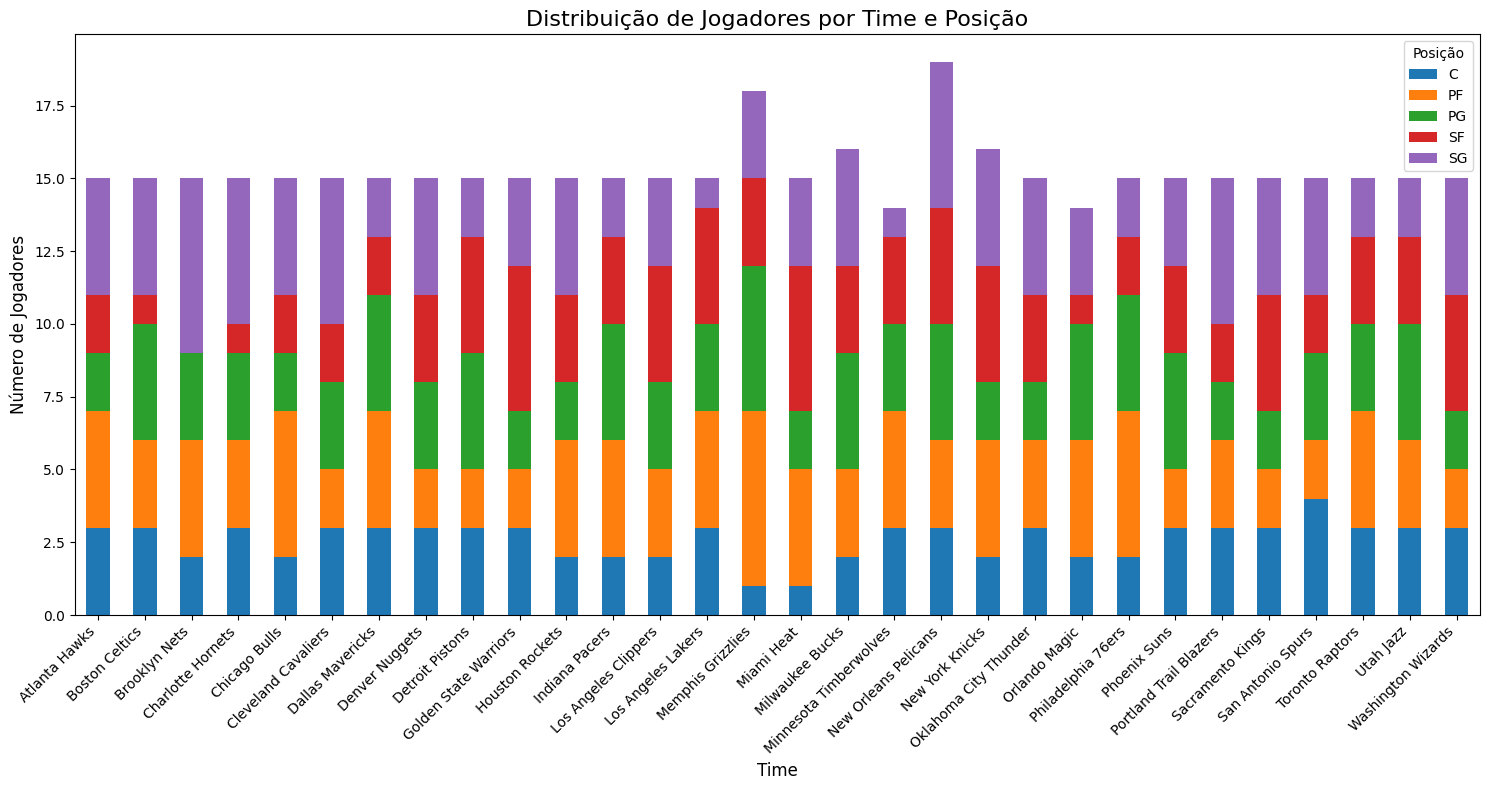

In [41]:
contagem_jogadores.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Distribuição de Jogadores por Time e Posição', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Posição')
plt.tight_layout()
plt.show()

In [42]:
media_por_time = pd.pivot_table(
    df_nba,
    values=['Height_cm', 'Weight_kg'],
    index='Team',
    aggfunc='mean')

print("Altura (cm) e Peso (kg) Médio por Time:")
display(media_por_time.round(2))

Altura (cm) e Peso (kg) Médio por Time:


,Height_cm,Weight_kg
Team,,
Atlanta Hawks,201.34,100.36
Boston Celtics,198.80,99.55
Brooklyn Nets,199.64,97.79
Charlotte Hornets,201.00,99.97
Chicago Bulls,202.52,99.31
Cleveland Cavaliers,201.00,103.36
Dallas Mavericks,202.69,102.97
Denver Nuggets,201.00,98.67
Detroit Pistons,200.15,100.79


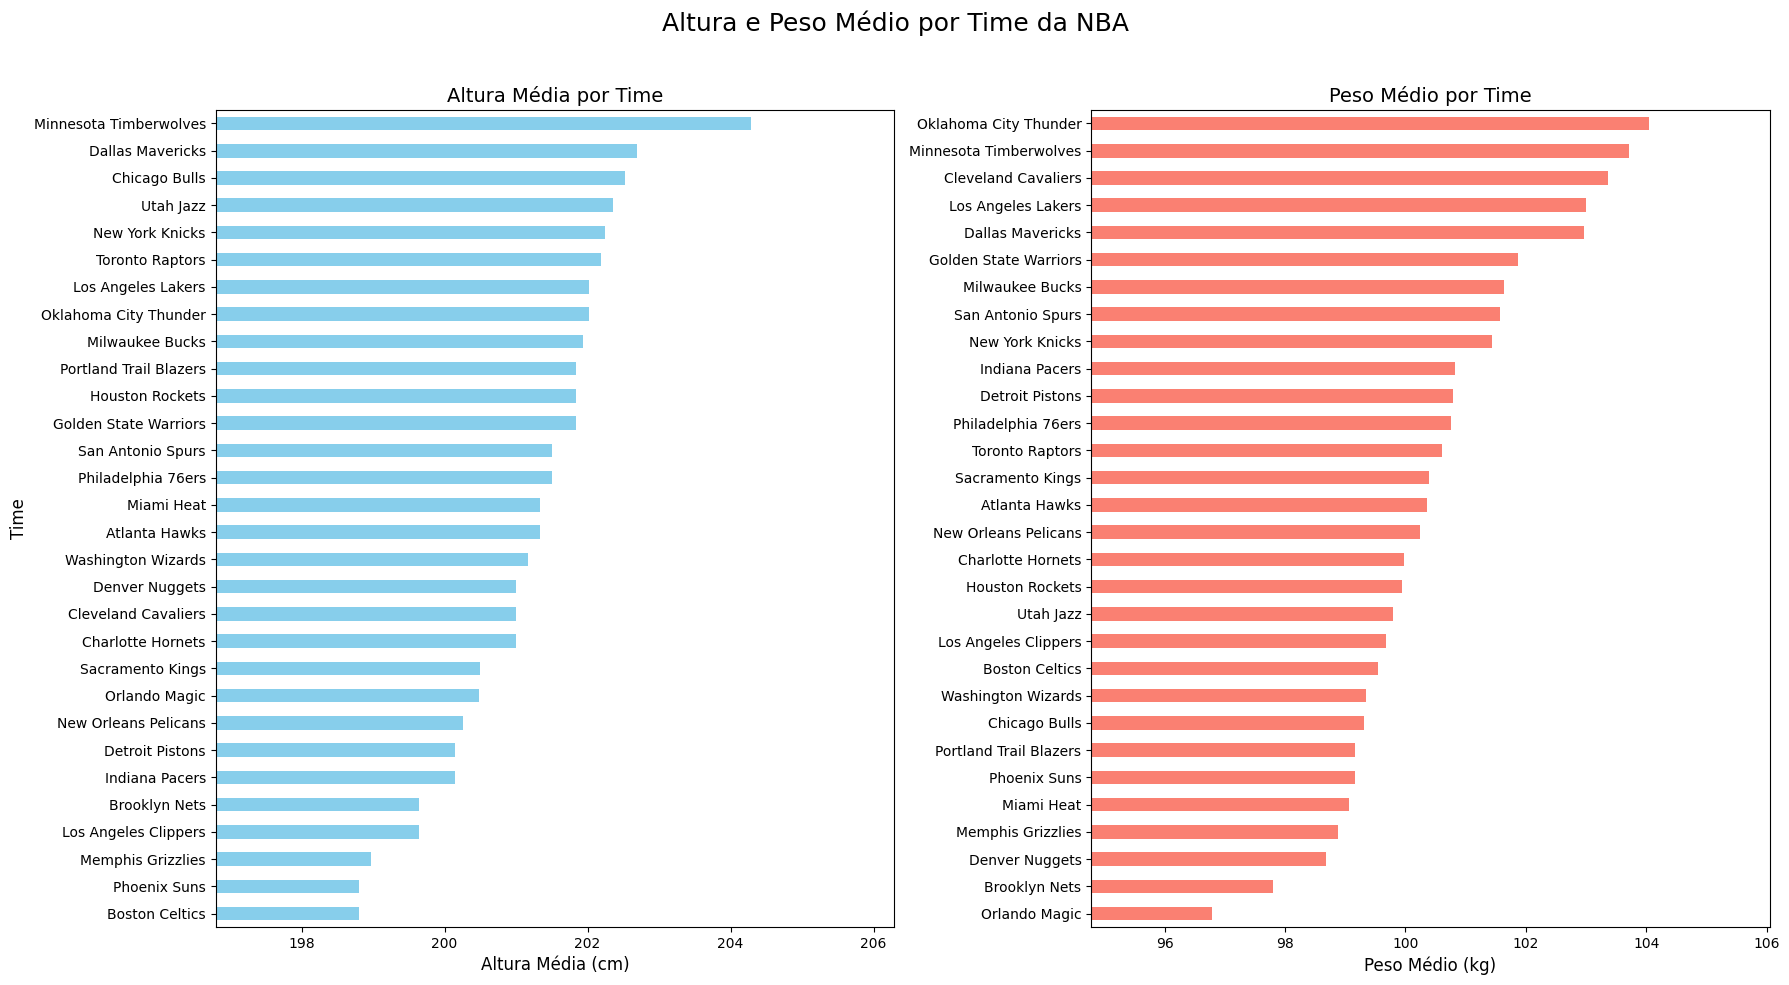

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

media_por_time['Height_cm'].sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Altura Média por Time', fontsize=14)
axes[0].set_xlabel('Altura Média (cm)', fontsize=12)
axes[0].set_ylabel('Time', fontsize=12)
axes[0].set_xlim(left = media_por_time['Height_cm'].min()-2, right = media_por_time['Height_cm'].max()+2)

media_por_time['Weight_kg'].sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Peso Médio por Time', fontsize=14)
axes[1].set_xlabel('Peso Médio (kg)', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(left=media_por_time['Weight_kg'].min() - 2, right = media_por_time['Weight_kg'].max() + 2)

fig.suptitle('Altura e Peso Médio por Time da NBA', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [44]:
media_por_time_posicao = pd.pivot_table(
    df_nba,
    values=['Height_cm', 'Weight_kg'],
    index=['Team', 'Position'],
    aggfunc='mean')

print("Altura (cm) e Peso (kg) Médio por Time e Posição:")
display(media_por_time_posicao.round(2))

Altura (cm) e Peso (kg) Médio por Time e Posição:


Height_cm  Weight_kg
Team               Position                      
Atlanta Hawks      C            213.36     113.40
                   PF           205.74     108.64
                   PG           186.69      81.19
                   SF           198.12      95.48
                   SG           196.85      94.35
...                                ...        ...
Washington Wizards C            209.13     110.68
                   PF           208.28     112.26
                   PG           191.77      87.32
                   SF           199.39      94.46
                   SG           198.12      95.25

[149 rows x 2 columns]

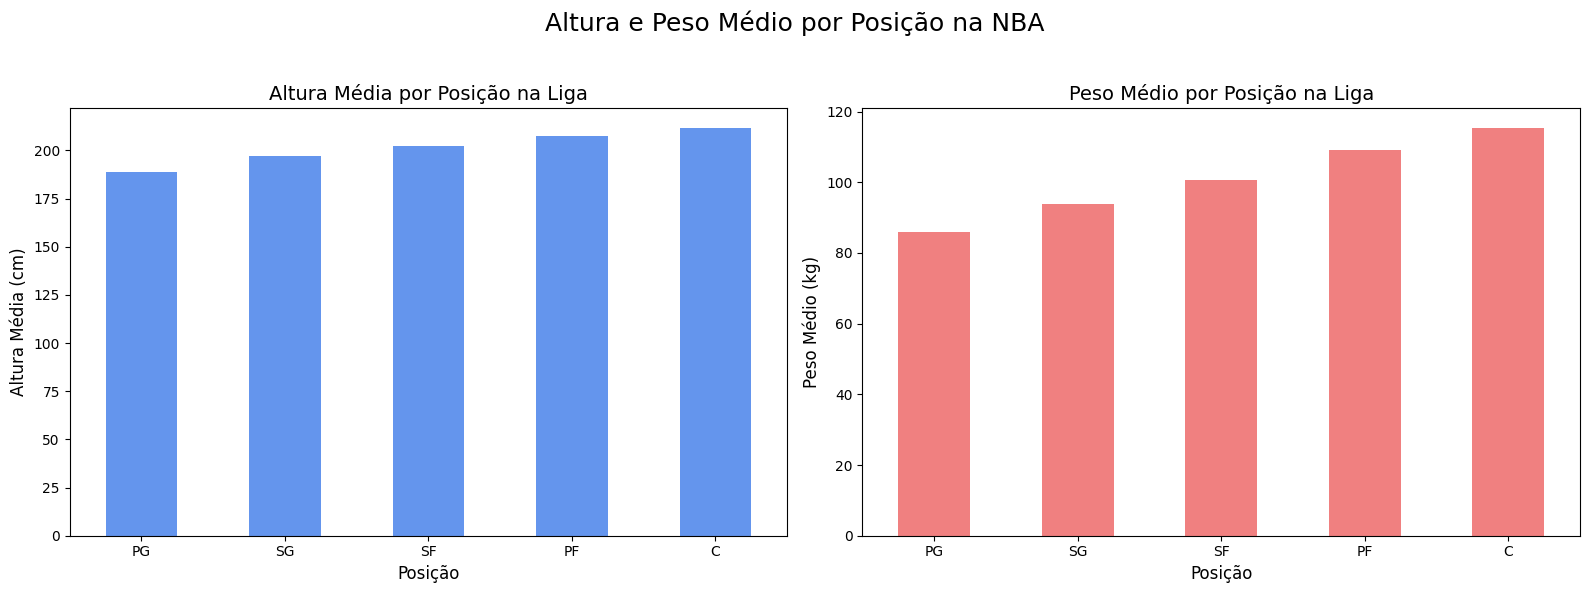

In [45]:
media_por_posicao_geral = df_nba.groupby('Position')[['Height_cm', 'Weight_kg']].mean().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

media_por_posicao_geral['Height_cm'].sort_values().plot(kind='bar', ax=axes[0], color='cornflowerblue')
axes[0].set_title('Altura Média por Posição na Liga', fontsize=14)
axes[0].set_ylabel('Altura Média (cm)', fontsize=12)
axes[0].set_xlabel('Posição', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

media_por_posicao_geral['Weight_kg'].sort_values().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Peso Médio por Posição na Liga', fontsize=14)
axes[1].set_ylabel('Peso Médio (kg)', fontsize=12)
axes[1].set_xlabel('Posição', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

fig.suptitle('Altura e Peso Médio por Posição na NBA', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()